# ニューラルネットワーク neural network

パーセプトロンの重みとバイアスを人が決めなければいけないという問題を解決する。

## パーセプトロンからニューラルネットワーク

入力層、中間層、出力層からなる。中間層は隠れ層と呼ばれることもある。

ネットワークの形は多層パーセプトロンと変わらない。

パーセプトロンのバイアスを図に明示するには、常に入力が１で重みがbのニューロンを加える。

$$y = h(b +  w_1 x_1 + w_2 x_2)$$

$$
\begin{equation}
h(x) = \left \{
\begin{array}{l}
0　( x \leqq 0 ) \\
1　( x \gt 0 )
\end{array}
\right.
\end{equation}
$$

h(x)は活性化関数と呼ばれる。さらに式を書き換える。

$$a = b +  w_1 x_1 + w_2 x_2$$

$$y = h(a)$$

この式により、これまで図示したyのニューロンの中に `a --h()--> y` という活性化関数のプロセスを明示できる。

パーセプトロンでは活性化関数にステップ関数を利用している。この活性化関数をステップ関数から別の関数に変更することでニューラルネットワークになる。

## シグモイド関数

$$
\begin{equation}
h(x) = \frac{1}{1 + exp(-x)}
\end{equation}
$$

In [1]:
# ステップ関数
def step_function(x):
    if x >0:
        return 1
    else:
        return 0

In [3]:
import numpy as np

def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [4]:
x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x > 0
print(y)

[-1.  1.  2.]
[False  True  True]


In [6]:
y = y.astype(np.int)
print(y)

[0 1 1]


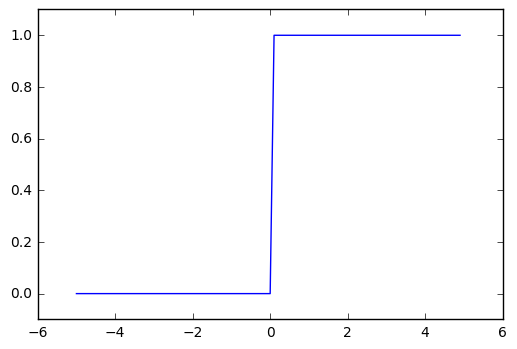

In [7]:
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
print(sigmoid(0.5))
print(sigmoid(np.array([-1.0, 1.0, 2.0])))

0.622459331202
[ 0.26894142  0.73105858  0.88079708]


In [10]:
x = np.array([-1.0, 1.0, 2.0])
print(x + 1, x / 2, 3 * x, 2 - x)

[ 0.  2.  3.] [-0.5  0.5  1. ] [-3.  3.  6.] [ 3.  1.  0.]


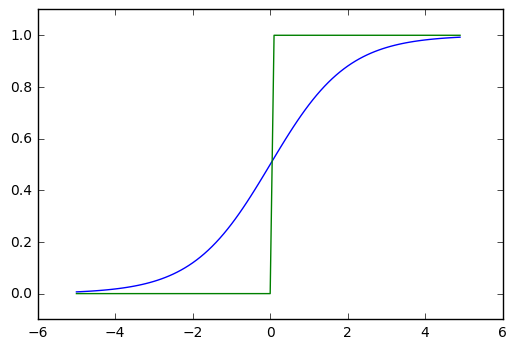

In [12]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)
plt.plot(x, y1)
plt.plot(x, y2)
plt.ylim(-0.1, 1.1)
plt.show()

ステップ関数が０か１しか取らないのに対し、シグモイド関数は0から1の間の少数を取る。

ステップ関数、シグモイド関数はともに非線形関数である。
線形関数は層を深くする効果がなくなってしまうため、ニューラルネットワークでは使えない。

最近はReLU関数 (Rectified Linear Unit)が主に用いられる。
ReLUは入力が0未満なら0、0以上ならそのまま出力する。

$$
\begin{equation}
h(x) = \left \{
\begin{array}{l}
x　( x \gt 0 ) \\
0　( x \leqq 0 )
\end{array}
\right.
\end{equation}
$$

In [13]:
def relu(x):
    return np.maximum(0, x)

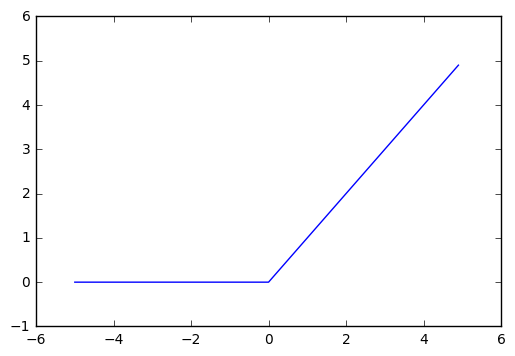

In [16]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 6.0)
plt.show()

In [18]:
A = np.array([1, 2, 3, 4])
print(A)

d = np.ndim(A) # 配列の次元を求める
print(d)

s = A.shape # 配列の形状はインスタンス変数のshapeで取得できる
print(s) # 1次元でも要素数が1のタプルになる。2次元以上の結果と統一するため

# タプル
t = (1, 'foo')
print(t[0], t[1])

[1 2 3 4]
1
(4,)
1 foo


In [19]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


### 行列の内積

$\begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix} \begin{pmatrix} 5 & 6 \\ 7 & 8 \end{pmatrix} = \begin{pmatrix} 19 & 22 \\ 43 & 50 \end{pmatrix}$


In [21]:
A = np.array([[1, 2], [3, 4]])
print(A.shape)

B = np.array([[5, 6], [7, 8]])
print(B.shape)

print(np.dot(A, B))
print(np.dot(B, A))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]
[[23 34]
 [31 46]]


In [22]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)

B = np.array([[1, 2], [3, 4], [5, 6]])
print(B.shape)

print(np.dot(A, B))
print(np.dot(B, A))

(2, 3)
(3, 2)
[[22 28]
 [49 64]]
[[ 9 12 15]
 [19 26 33]
 [29 40 51]]


In [24]:
C = np.array([[1, 2], [3, 4]])
print(C.shape)

print(A.shape)

print(np.dot(A, C))

'''
内積を計算する行列は要素数があっていないといけない
3 x 2 dot  2 x 4 = 3 x 4
'''

(2, 2)
(2, 3)


ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [25]:
'''
ニューラルネットワークの実装
バイアスと活性化関数は省略し、重みだけがある

ニューラルネットワークでも、層と層の間の重みは行列の内積の関係になる
'''
X = np.array([1, 2])
X.shape

(2,)

In [26]:
W = np.array([[1, 3, 5], [2, 4, 6]])
W

array([[1, 3, 5],
       [2, 4, 6]])

In [27]:
W.shape

(2, 3)

In [28]:
Y = np.dot(X, W)
Y

array([ 5, 11, 17])